<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Visualisation in Python
© ExploreAI Academy

In this exercise, we will practise and reinforce all that we have learned about data visualisation in Python.

## Learning objectives

By the end of this exercise, you should be able to:
* Navigate a Pandas DataFrame.
* Slice, group, sort, and sum data in a DataFrame to create insightful visualisations.
* Produce basic and advanced visualisations in Python.



## Exercises

We are the team managers of a soccer club and are keen on leveraging data to gain insights into the performance of our players. The dataset at our disposal contains valuable information about each player's skills, age, and overall rating. As managers, we have specific questions in mind that will help us make informed decisions and strategies for the upcoming season.

Let's start by importing the libraries we're going to need and loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
soccer_df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv",low_memory=False)
soccer_df

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,England,46,24,16,38,26,12,23,...,19,19,10,32,28,11,50,26,6,GK
17977,B. Richardson,47,England,46,25,44,35,44,22,44,...,12,13,13,25,32,12,47,17,12,GK
17978,J. Young,17,Scotland,46,66,26,60,77,41,50,...,42,42,14,51,33,17,32,37,33,ST
17979,J. Lundstram,18,England,46,57,46,58,74,43,45,...,49,43,47,58,49,48,46,51,25,CM


Let's change the following columns to numerical values.

In [3]:
cols = ['Age', 'Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

soccer_df[cols] = soccer_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

### Exercise 1

Now that we've loaded the dataset, we are curious about how players from different nationalities perform on average. We want to compare the overall ratings across the countries producing the highest number of players. We decide to create a bar graph to compare the average overall ratings of players, specifically for the top five nationalities, **based on the total number of players per country**. This insight will help us identify potential strengths within our team.

Create a bar graph using `Matplotlib` to represent the average overall rating for players from the top five nationalities (**based on the number of players in each nationality**). Be sure to customise the graph as you see fit.


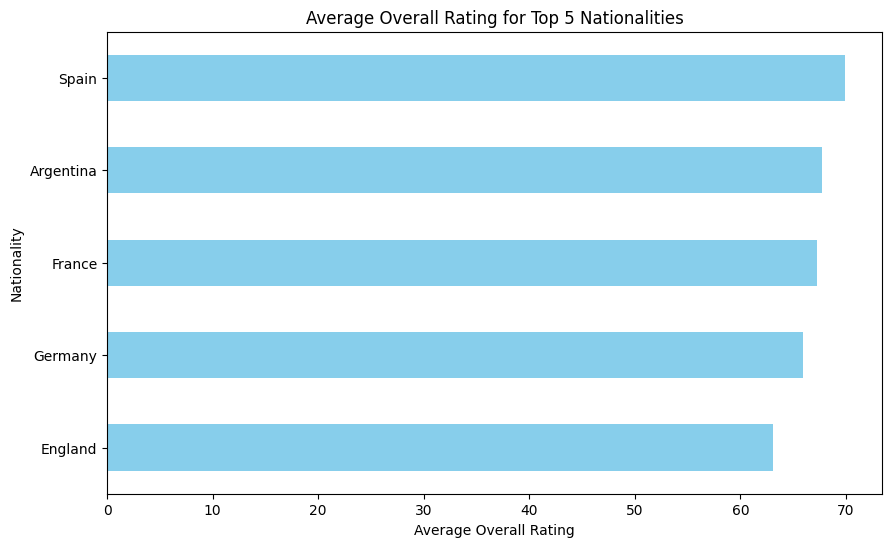

In [23]:
top_nationalities = soccer_df['Nationality'].value_counts().head(5).index

top_players_df = soccer_df[soccer_df['Nationality'].isin(top_nationalities)]

avg_ratings = top_players_df.groupby('Nationality')['Overall'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
avg_ratings.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Overall Rating for Top 5 Nationalities')
plt.xlabel('Average Overall Rating')
plt.ylabel('Nationality')
plt.show()

### Exercise 2

As we delve deeper into player analysis, we wonder about the age distribution of our team. A pie chart showcasing the percentage distribution of player ages will provide a clear picture. Understanding the age demographics helps us plan for the team's future and potential recruitment strategies. We have decided to categorise players into specific age groups, specifically `[15-19]`, `[20-24]`, `[25-29]`, `[30-34]`, and `[35+]`.

Generate a pie chart to visualise the percentage distribution of player ages. 

**Hint**: `pd.cut` is a function in the Pandas library designed for binning or categorising continuous data into discrete intervals, also known as bins. This function is particularly useful when dealing with numerical data that we want to group into meaningful ranges. We can use `pd.cut` to help us create a more interpretable representation of player ages by categorising them into specific age groups.

**Syntax**: 

`pd.cut(x, bins)`

* `x`: The input array or Series that we want to bin.
* `bins`: Defines the bin edges. It can be an integer specifying the number of equal-width bins or a sequence specifying the bin edges.

Use bins of `[15, 20, 25, 30, 35]` to categorise players into specific age groups before plotting the pie chart.


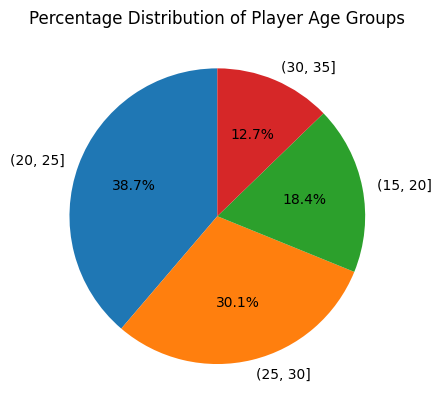

In [27]:
age_bins = [15, 20, 25, 30, 35]
soccer_df['Age Group'] = pd.cut(soccer_df['Age'],bins=age_bins)

plt.Figure(figsize=(10,10))
soccer_df['Age Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Player Age Groups')
plt.ylabel('')  # Remove the default 'Age Group' label on the y-axis
plt.show()

### Exercise 3

To enhance our team's fitness and agility, we decide to explore how certain skills, like `Acceleration` and `Sprint speed`, vary across different age groups. A line graph depicting the trends will guide our training and conditioning strategies for players of different ages.

Create a line graph using `Matplotlib` to show the trend of average `Acceleration` and `Sprint speed` across different age groups. Customise the graph appropriately.

Assume that the age bins are defined as `[15, 20, 25, 30, 35]`.

<Figure size 1000x600 with 0 Axes>

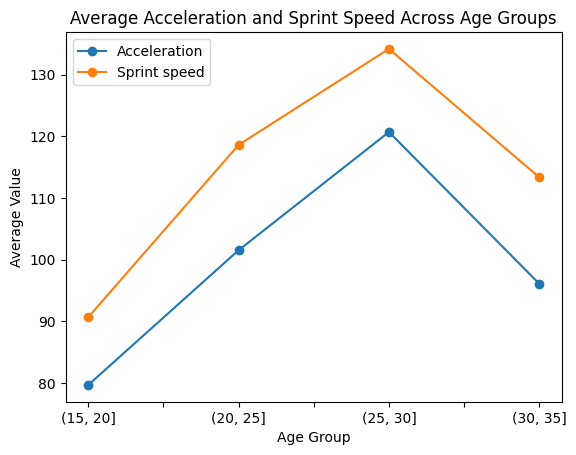

In [30]:
age_group_stats = soccer_df.groupby('Age Group')[['Acceleration', 'Sprint speed']].mean()

plt.figure(figsize=(10,6))
age_group_stats.plot(kind='line', marker='o')
plt.title('Average Acceleration and Sprint Speed Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Value')
plt.show()

### Exercise 4

Focused on excellence, we narrow our analysis to players from the top three nationalities based on the highest average `Overall` rating. Slicing the dataset, we create a box plot to compare skill distributions, providing a detailed profile of the top-performing players.

Slice the dataset to only include players from the **top three nationalities** with the highest average `Overall` rating. Then, create a box plot using Seaborn to compare the distribution of specific skills, including `Dribbling`, `Short passing`, `Shot power`, and `Ball control` for players from these nations.

In [ ]:
# insert code here

### Exercise 5

Embracing modern tools, we want to utilise Plotly to create an interactive visualisation. This dynamic plot will empower us to explore the intricate relationships between our categories. We also want to include hover information to add an extra layer of insight for more informed decision-making.

Implement an interactive visualisation using Plotly to allow users to explore the relationship between `Strength`, `Vision`, and the `Overall` rating using the **hover information** feature to allow the user to have an interactive view of the data.

Arrange the plot as follows:

* Place `Strength` on the x-axis.
* Place `Vision` on the y-axis.
* Colour-code the points to represent the `Overall` rating.
* Include a hover that has the name of the player as well as the  `Strength`, `Vision`, and `Overall` ratings for each player.

In [ ]:
# insert code here

## Solutions

### Exercise 1

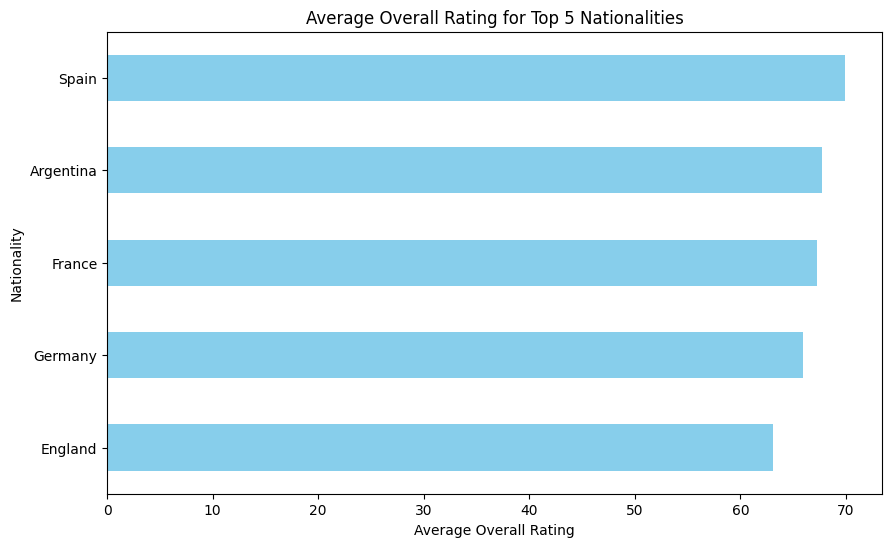

In [17]:
# Identify the top five nationalities based on the player count
top_nationalities = soccer_df['Nationality'].value_counts().head(5).index

# Filter the dataset for players from the top five nationalities
top_players_df = soccer_df[soccer_df['Nationality'].isin(top_nationalities)]

# Calculate the average overall rating for each nationality
avg_ratings = top_players_df.groupby('Nationality')['Overall'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
avg_ratings.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Overall Rating for Top 5 Nationalities')
plt.xlabel('Average Overall Rating')
plt.ylabel('Nationality')
plt.show()

As we can see, Spain has the highest overall rating among the top five nationalities, while England has the lowest.

### Exercise 2


In [ ]:
# Bin ages into groups
age_bins = [15, 20, 25, 30, 35]
soccer_df['Age Group'] = pd.cut(soccer_df['Age'], bins=age_bins)

# Plotting the pie chart for age distribution
plt.figure(figsize=(10, 10))
soccer_df['Age Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Percentage Distribution of Player Age Groups')
plt.ylabel('')  # Remove the default 'Age Group' label on the y-axis
plt.show()

As we can see, the 20 to 25 age group accounts for approximately 39% of our players, followed by the 25 to 30 age group at approximately 30% of our player population.

### Exercise 3

<Figure size 1000x600 with 0 Axes>

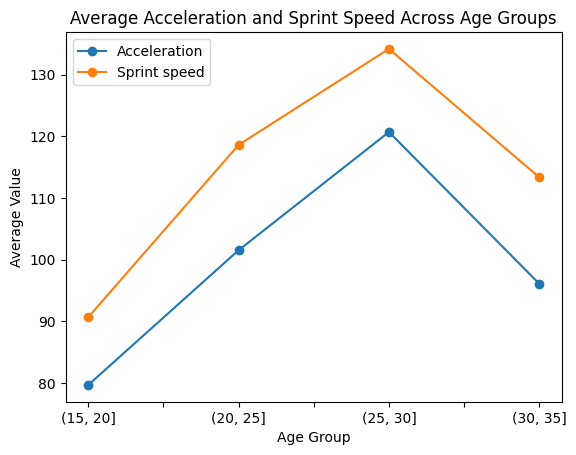

In [28]:
# Grouping by age group and calculating average Acceleration and Sprint Speed
age_group_stats = soccer_df.groupby('Age Group')[['Acceleration', 'Sprint speed']].mean()

# Plotting the line graph
plt.figure(figsize=(10, 6))
age_group_stats.plot(kind='line', marker='o')
plt.title('Average Acceleration and Sprint Speed Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Value')
plt.show()

This figure shows that players improve in both Acceleration and Speed from the age of 15 to the age of 30, however, these values appear to decrease as players age beyond the age of 30.

### Exercise 4

In [ ]:
# Find the top three nationalities with the highest average Overall rating
top_nationalities = soccer_df.groupby('Nationality')['Overall'].mean().nlargest(3).index

# Slice the dataset for players from the top three nationalities
top_players_df = soccer_df[soccer_df['Nationality'].isin(top_nationalities)]

# Define the specific skills for comparison
skills_to_compare = ['Dribbling','Short passing','Shot power', 'Ball control']

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Nationality', y='value', hue='variable', data=pd.melt(top_players_df, id_vars=['Nationality'], value_vars=skills_to_compare))
plt.title('Distribution of Skills for Top 3 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Skill Value')
plt.show()

The resulting plot is a box plot with distinct boxes for each selected skill (i.e. `Dribbling`, `Short passing`, ` Shot power`, `Ball control`) for players from `Syria`, `Cuba`, and `Oman`. The boxes illustrate the interquartile range (IQR) and median, while the whiskers depict the range of values. Outliers can also be seen, giving insights into the variation of these skills among players from different nationalities. Overall, the plot aids in understanding the comparative skill distribution and potential areas for improvement or emphasis in training for players from the identified top-performing nationalities.

Interestingly, although `Oman` is one of the top three countries based on overall rating, the values for our chosen categories are so low that they are barely visible on the plot. Could this imply that there are additional factors that determine if a nationality has the highest overall rating?

### Exercise 5

In [ ]:
import plotly.express as px

# Scatter plot using Plotly
fig = px.scatter(soccer_df, x='Strength', y='Vision', color='Overall', hover_name='Name',
                 title='Interactive Scatter Plot of Strength and Vision vs Overall Rating',
                 labels={'Strength': 'Strength Rating', 'Vision': 'Vision Rating', 'Overall': 'Overall Rating'})

# Show the interactive plot
fig.show()

The resulting scatter plot provides an interactive visual representation of the relationship between `Strength` and `Vision` ratings concerning the `Overall` rating for each player, seen when we hover over each point on our plot. We are also able to interactively zoom in and out of the data points in the graph. 

Analyse the plot to identify patterns or clusters, and consider how these two attributes relate to the overall performance of the players.

# Summary

This exercise underscores the symbiotic relationship between data preparation and visualisation. Mastery of both facets empowers us to unleash the full potential of Python's visualisation libraries, creating impactful visuals that tell compelling data stories.

As we continue our data science journey, remember that proficiency in data preparation and visualisation techniques is a cornerstone for extracting actionable insights and making informed decisions. Keep honing these skills, explore diverse datasets, and embrace the creative possibilities that effective data visualisation affords.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>